In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, style,gridspec
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize, fftpack, stats
from scipy.integrate import odeint
style.use('fivethirtyeight') 

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
# The expected value of hurricanes
μ = 6.3

# Number of hurricanes in 2005
x0 = 15

# The standard deviation μ
σ = np.sqrt(μ)

# Calculating Z-score
z = abs(x0-μ)/σ

print("Z = ", z)

Z =  3.4661629670697414


Text(0.5, 0, '$x$')

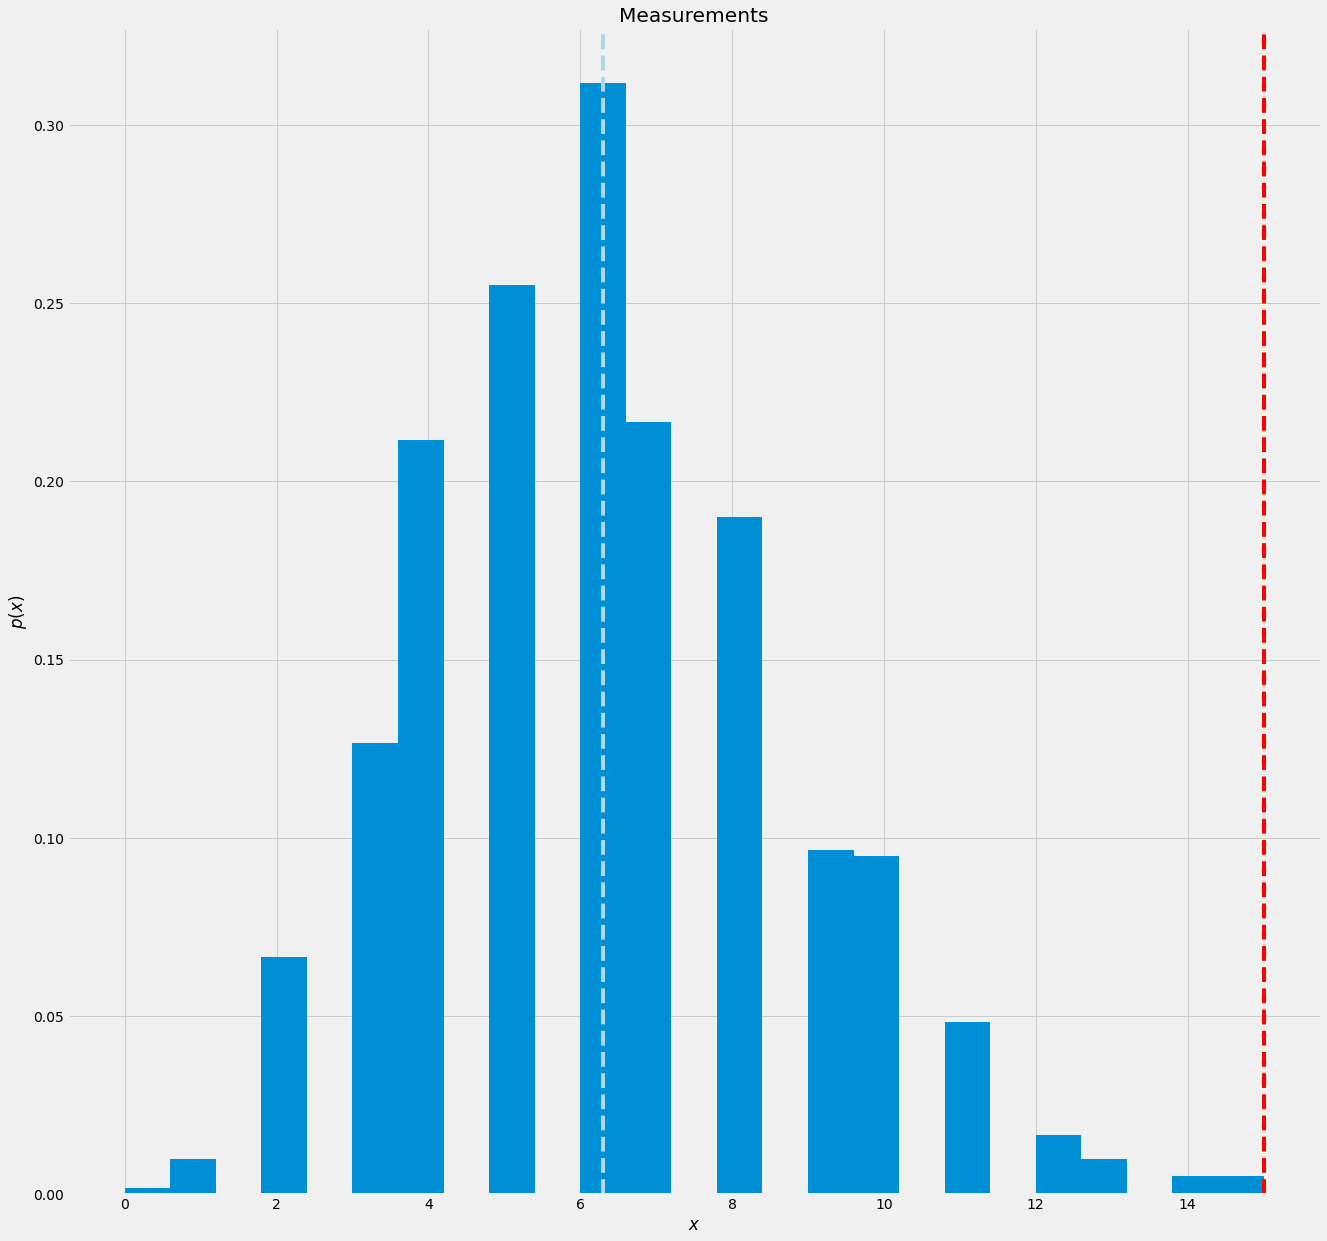

In [3]:
# plot the measurement and its assumed pdf
plt.figure(figsize = (20,20))
x = x = stats.poisson.rvs(mu=μ, loc=0, size=1000)
plt.hist(x, bins=25, density=True)
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(μ, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")

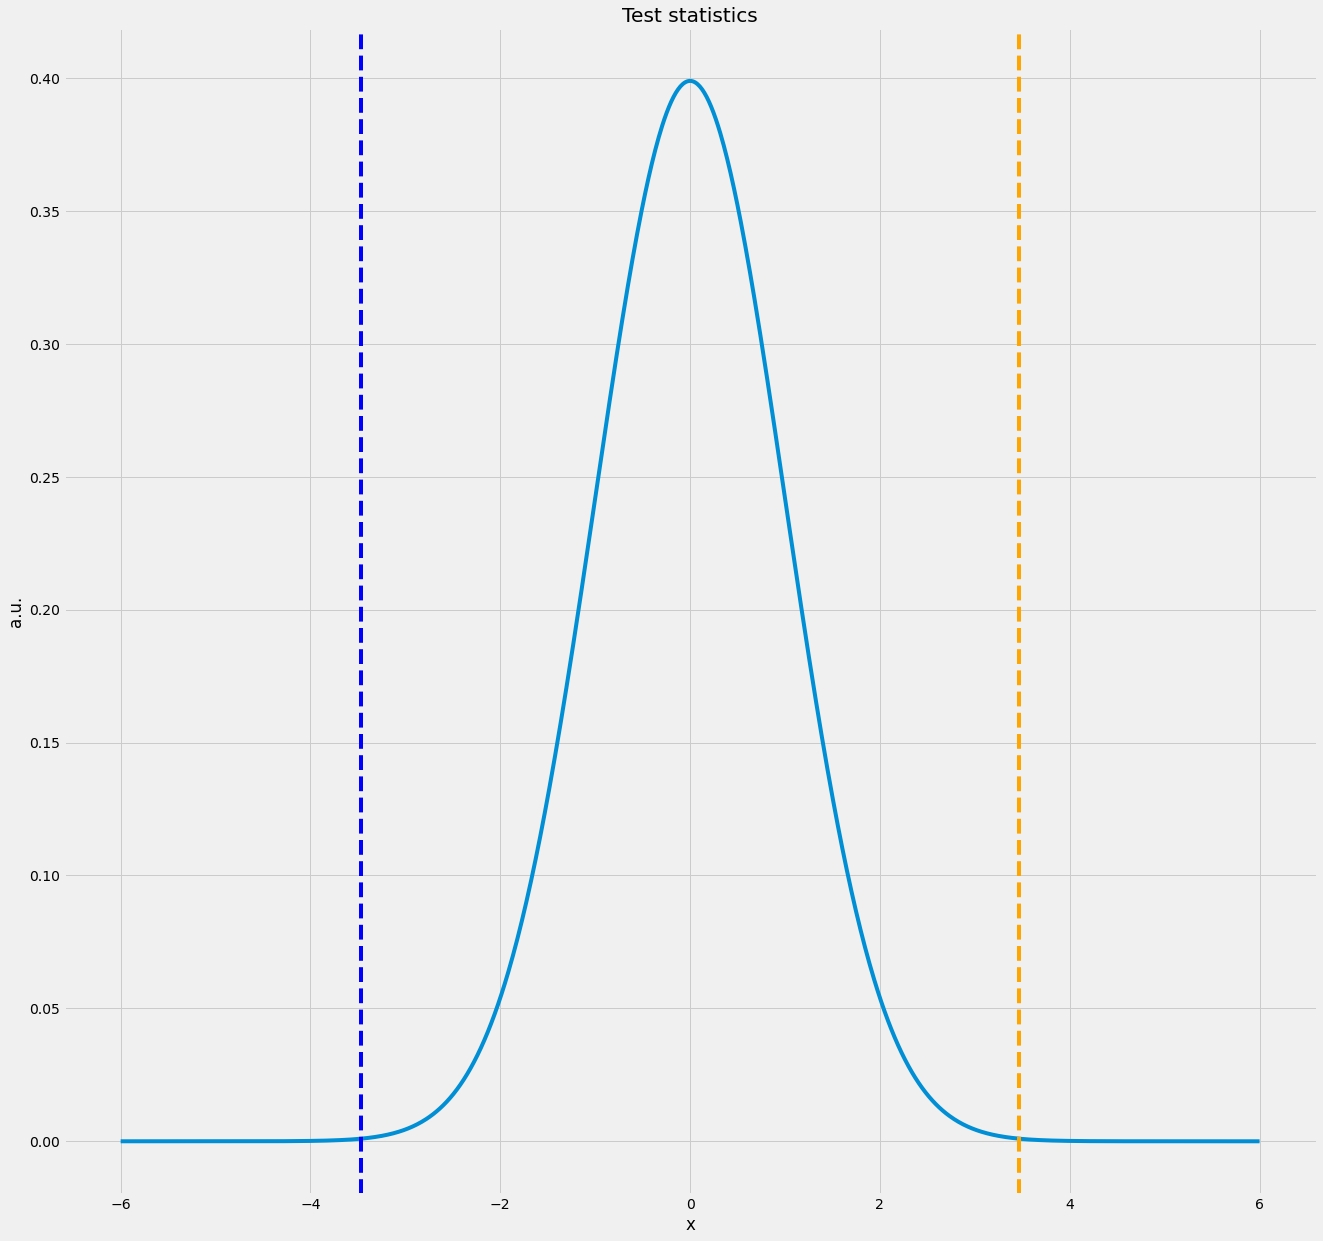

In [4]:
# plot the test statistics and its pdf
plt.figure(figsize = (20,20))
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(z), color='lightblue')
plt.axvline(z, linestyle='--', color='orange')
plt.axvline(-z, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

Text(0.5, 0, 'x')

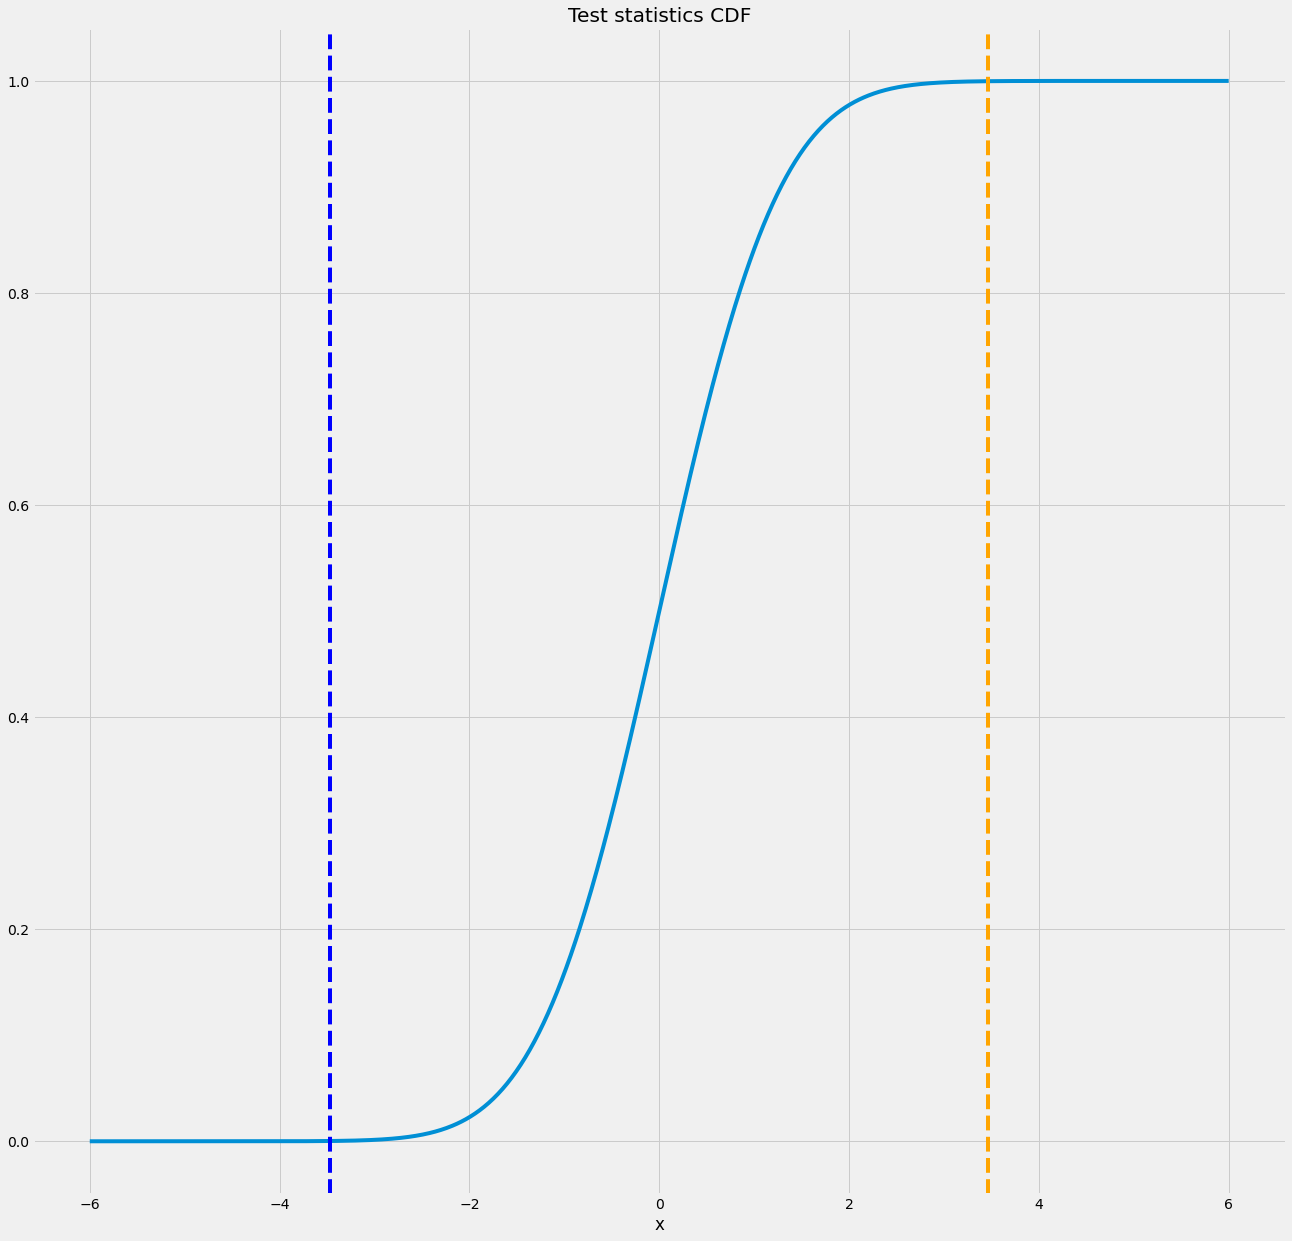

In [5]:
# plot the Gaussian Comulative Distribution Function
plt.figure(figsize = (20,20))
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(z, linestyle='--', color='orange')
plt.axvline(-z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")

In [6]:
# calculate the p-value as the sum of the left tail + the right tail
pvalue_1 = stats.norm.cdf(-z) + (1. - stats.norm.cdf(z))
pvalue_2 = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
print("p-value(z = 3.46) =", pvalue_1)
print("p-value(z = 3) =", pvalue_2)

p-value(z = 3.46) = 0.0005279431738299246
p-value(z = 3) = 0.0026997960632601965


Comparing the two p-values, we can see that the first p-value (pvalue_1) is smaller than the second p-value (pvalue_2), which means that the first test provides stronger evidence against the null hypothesis. This suggests that the number of hurricanes in 2005 (15) is even more unlikely to be due to chance compared to if we were considering a Z-score threshold of 3.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

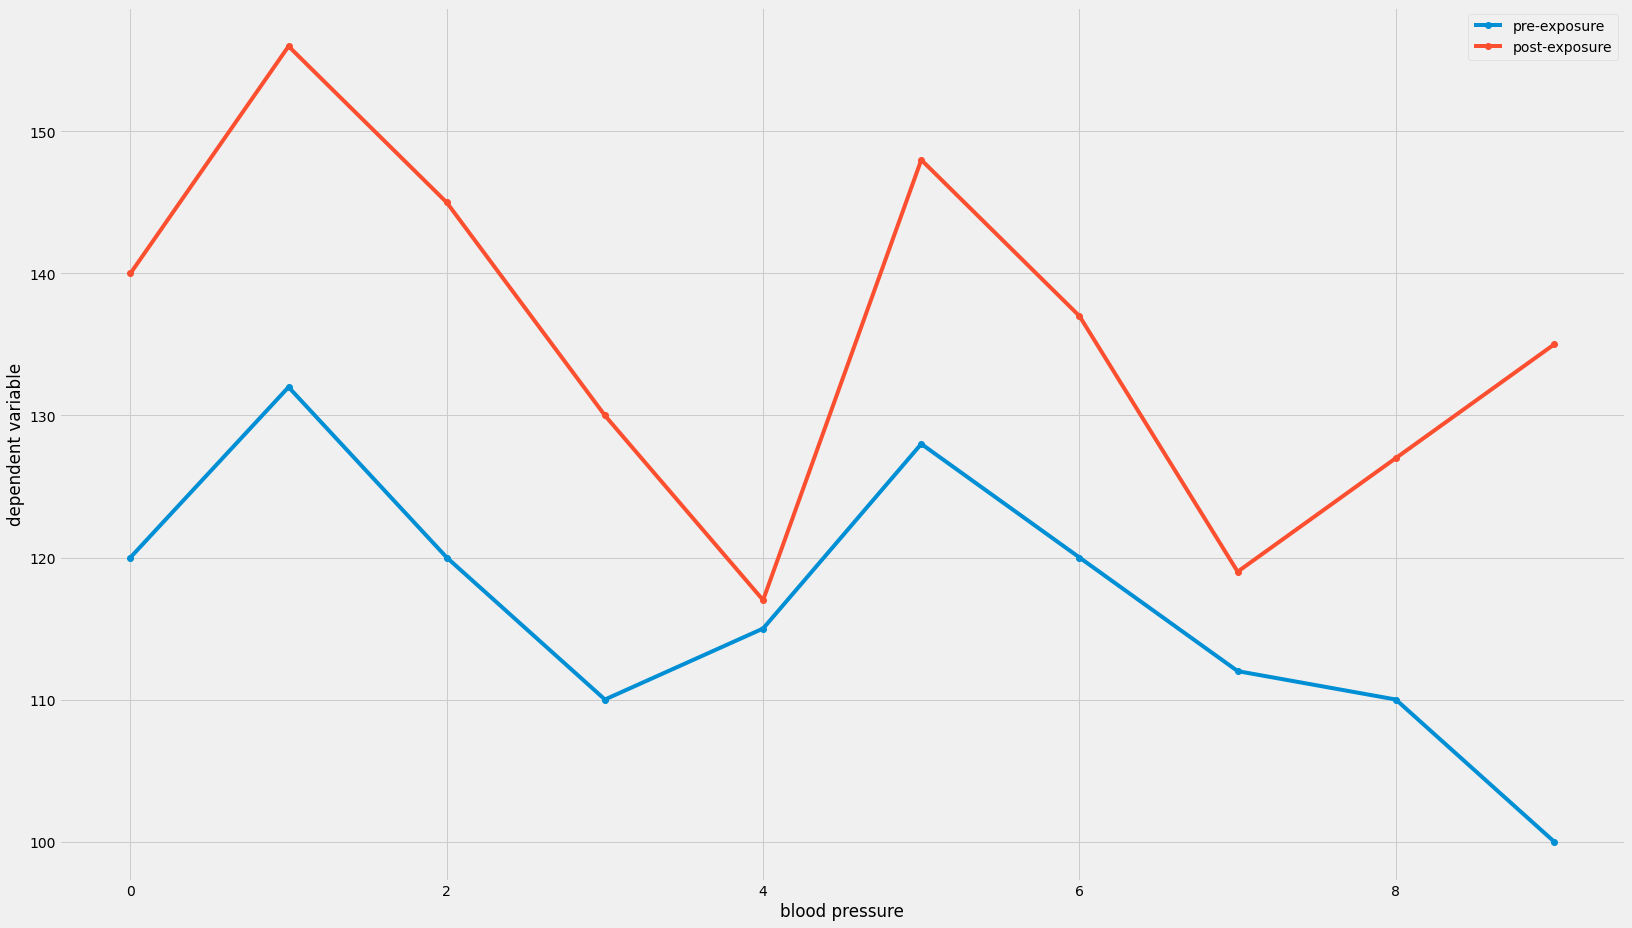

In [7]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# plot the raw data
plt.figure(figsize=(25,15))
plt.plot(pre, '-o', label="pre-exposure")
plt.plot(post, '-o', label="post-exposure")
plt.ylabel("dependent variable")
plt.xlabel('blood pressure')
plt.legend()
plt.show()

In [8]:
n = len(pre) # the size of the data sample

# calculate the mean of the pre and post
mu_pre = np.mean(pre)
mu_post = np.mean(post)

# calculate the variance and its sqrt()
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))

# calculate sigma
sigma = np.sqrt((sigma_pre**2+sigma_post**2)/2)
print('σ  = ', sigma)

# calculate the test statistics
T = (mu_pre-mu_post)/(sigma*np.sqrt(2/n))
print("T =", T)

σ  =  11.04158805003459
T = -3.786997938137629


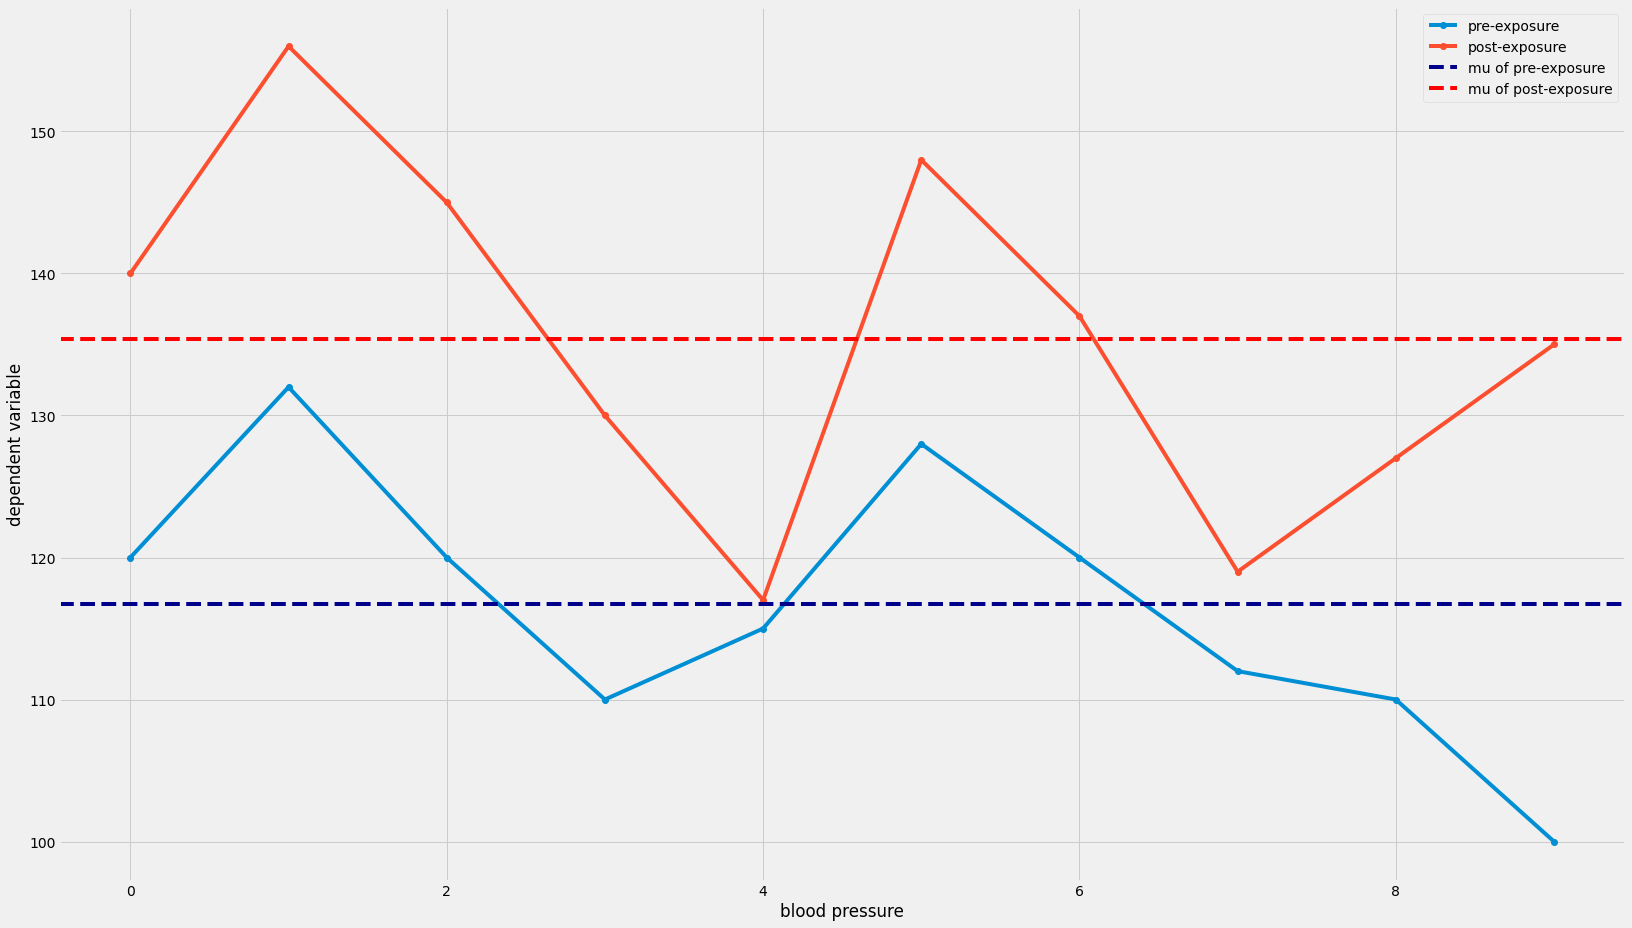

In [9]:
# plot the measurents
plt.figure(figsize=(25,15))
plt.plot(pre, '-o', label="pre-exposure")
plt.plot(post, '-o', label="post-exposure")
plt.axhline(mu_pre, linestyle='--', color='darkblue', label="mu of pre-exposure")
plt.axhline(mu_post, linestyle='--', color='red', label="mu of post-exposure")
plt.ylabel("dependent variable")
plt.xlabel('blood pressure')
plt.legend()

Text(0.5, 0, 't')

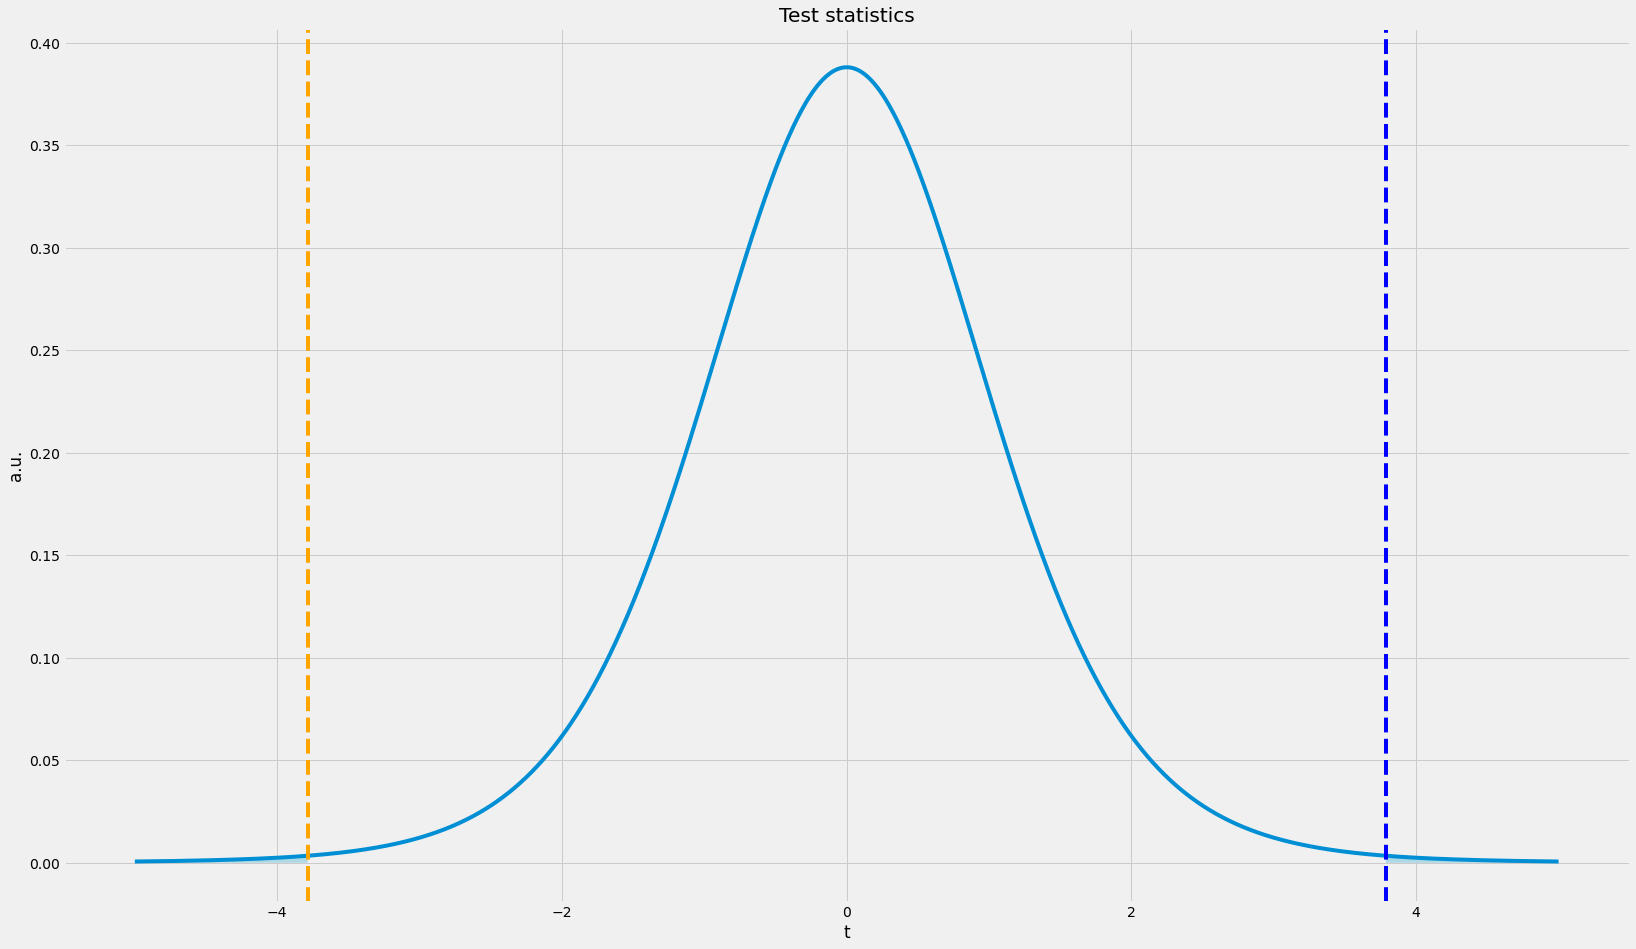

In [10]:
# plot the test statistics and its pdf
plt.figure(figsize=(25,15))
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")

In [11]:
# now we calculate the p-value. Since it's double sided:
p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", p_value)

# Significance level
alpha = 0.05 

if p_value <= alpha:
    print("Since the p-value is  < α , we reject the null hypothesis, \nThe change in blood pressure within the sample is statistically significant at the {:.2f} level of significance.".format(alpha))
else:
    print("Since the p-value is > α , we accept the null hypothesis, \nThe change in blood pressure within the sample is not statistically significant at the {:.2f} level of significance.".format(alpha))

p-value = 0.004302464132864604
Since the p-value is  < α , we reject the null hypothesis, 
The change in blood pressure within the sample is statistically significant at the 0.05 level of significance.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [12]:
max_temperature = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temperature = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(12)

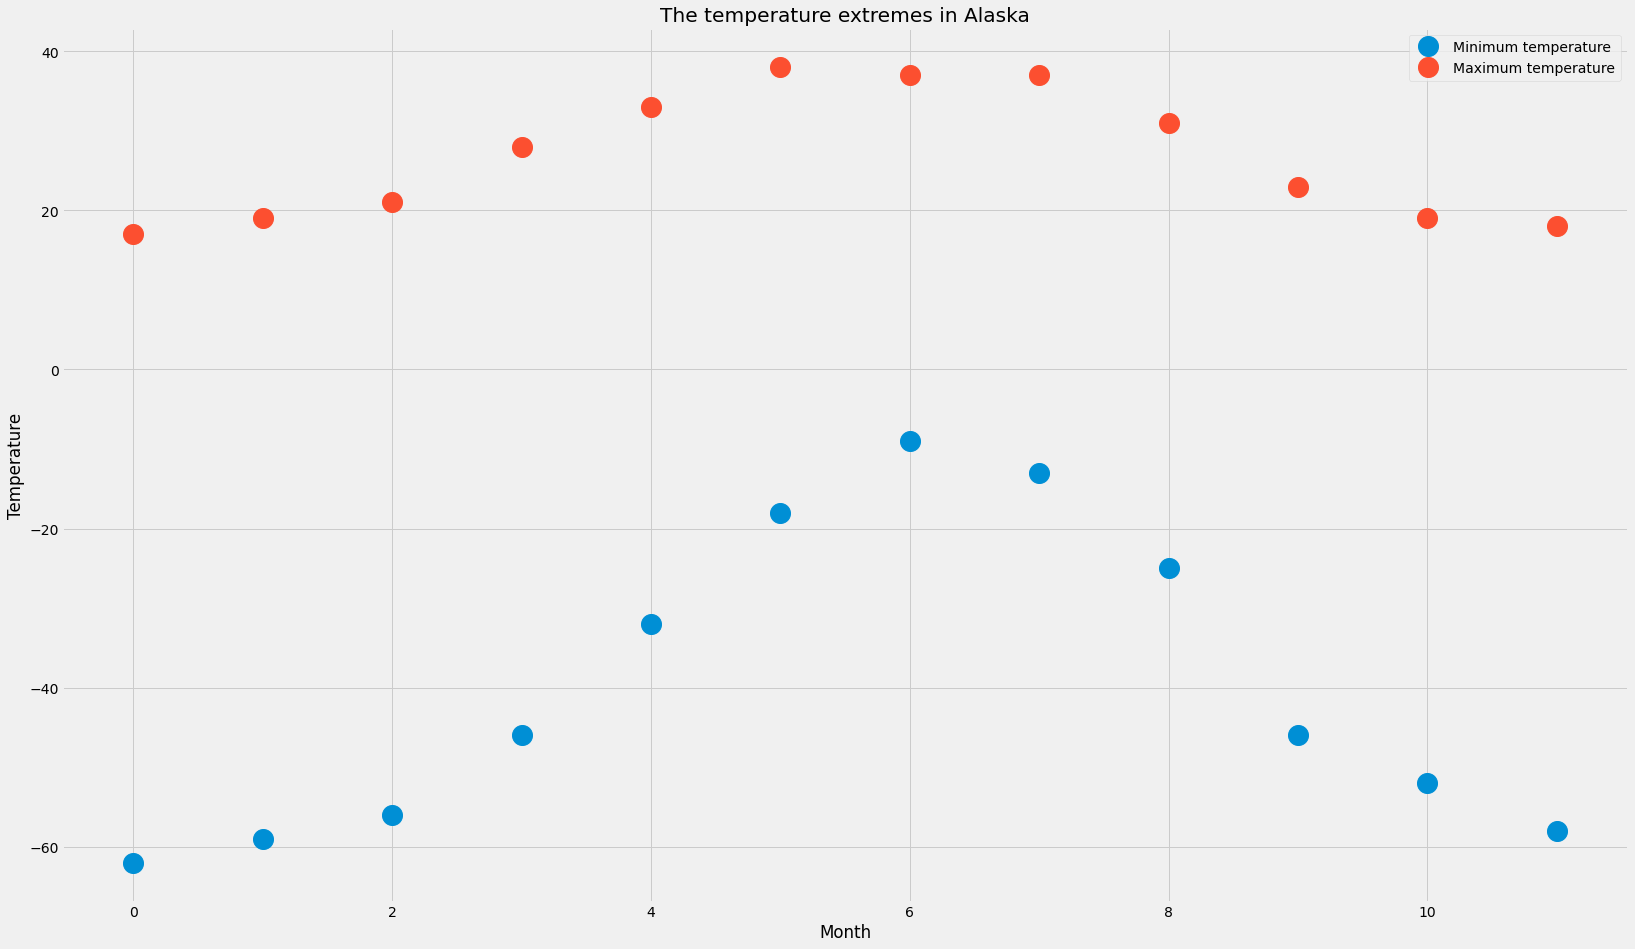

In [13]:
# Plot these temperatures.
plt.figure(figsize=(25,15))
plt.plot(months, min_temperature, 'o', months, max_temperature,'o', markersize=20)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('The temperature extremes in Alaska')
plt.legend(['Minimum temperature','Maximum temperature' ])

In [14]:
def cos(t, a,b,c,d):
    return a * np.sin(b * t + c) + d

params_max, cov_max = optimize.curve_fit(cos, months,max_temperature, [ 10, 1,0,20])
params_min, cov_min = optimize.curve_fit(cos, months,min_temperature, [30,1, 0,-40])

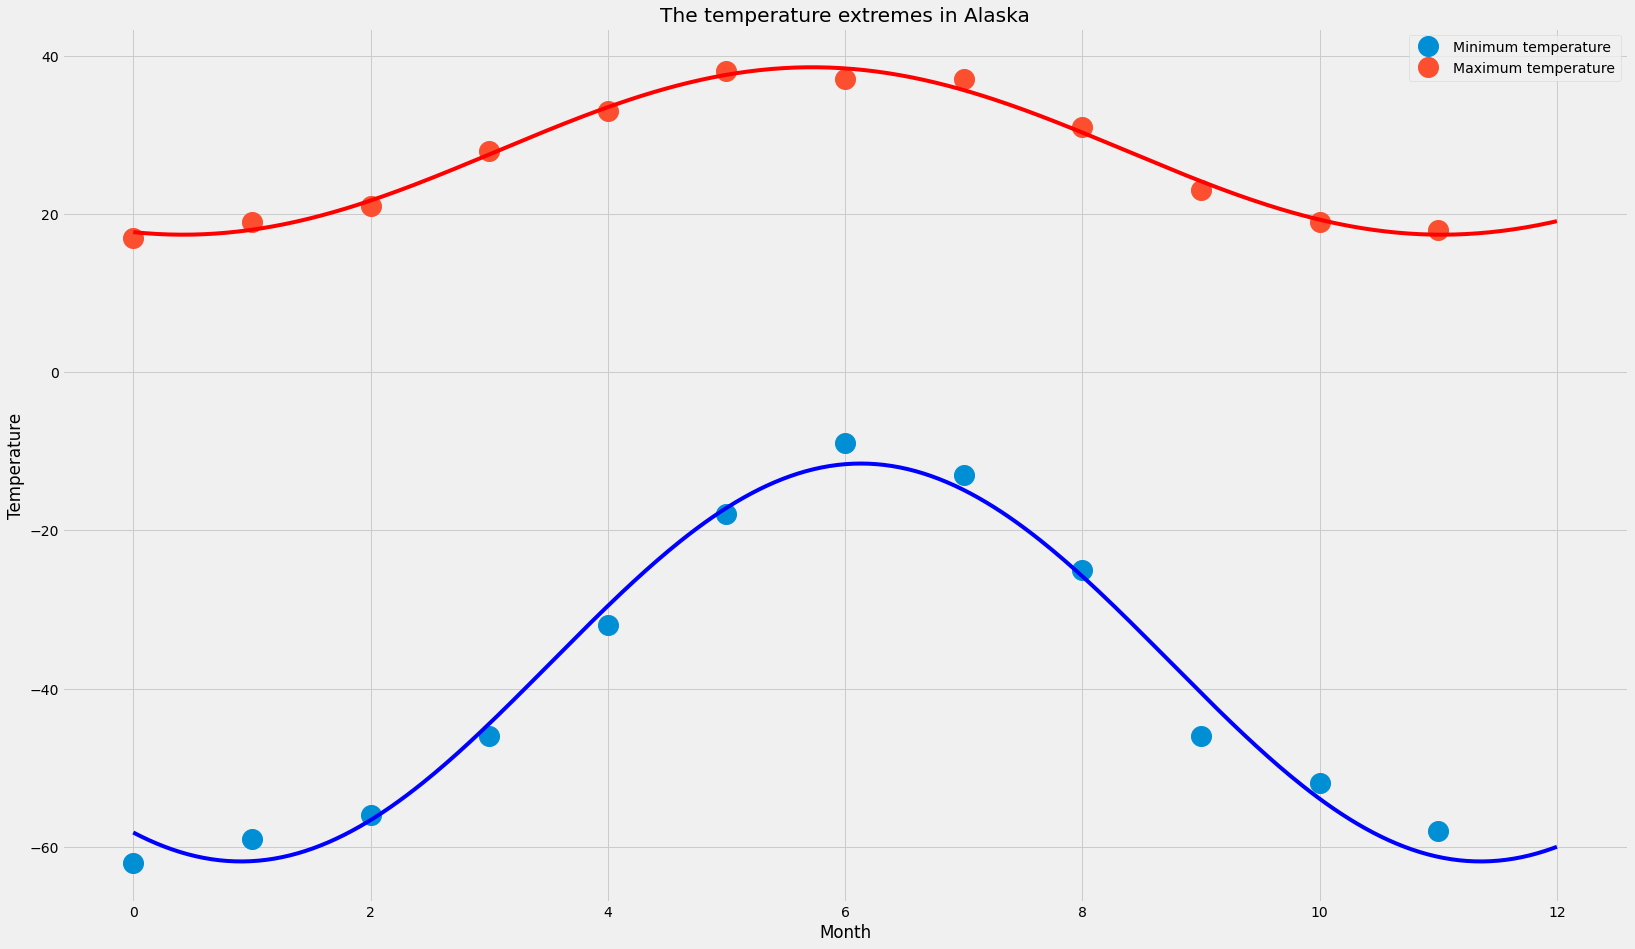

In [15]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(25,15))
plt.plot(months, min_temperature, 'o', months, max_temperature,'o', markersize=20)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('The temperature extremes in Alaska')
plt.legend(['Minimum temperature','Maximum temperature' ])

plt.plot(days, cos(days, *params_max), 'r-')
plt.plot(days, cos(days, *params_min), 'b-')



In [16]:
print('The best-fit values of the parameters are for the minimum temperature : \na = {} \nb = {} \nc = {} \nd = {} '.format(*params_min))
print('\nThe best-fit values of the parameters are for the maximum temperature : \na = {} \nb = {} \nc = {} \nd = {} '.format(*params_max))
print('\nThe overall average of minimum temperature is: {:1.1f} °C'.format(np.mean(min_temperature)))
print('\nThe overall average of maximum temperature is: {:1.1f} °C'.format(np.mean(max_temperature)))
print('\nThe minimum temperature of year are:  {:.2f} °C'.format( cos(months, *params_min).min()))
print('\nThe hottest temperature of year are: {:.2f} °C'.format(cos(months, *params_max).max()))

The best-fit values of the parameters are for the minimum temperature : 
a = -25.14961986156107 
b = 0.6013209314317456 
c = 1.0244908537512376 
d = -36.71256484359646 

The best-fit values of the parameters are for the maximum temperature : 
a = 10.581699547689716 
b = 0.5922742379012037 
c = 4.464529540912463 
d = 27.949635356275362 

The overall average of minimum temperature is: -39.7 °C

The overall average of maximum temperature is: 26.8 °C

The minimum temperature of year are:  -61.82 °C

The hottest temperature of year are: 38.39 °C


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [17]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-20 07:56:49--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 07:56:49--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2bbff0b7074501611f1284a9ab.dl.dropboxusercontent.com/cd/0/inline/B06J-s8CacTwOB-XuO-coprK75o98JQ7X1Y2b4GJK8DXFqmJ69K8_8AW4ZdnobAIhE1-LZrb3sijWR-4fICN2KF0l8e7yCnxvUbhwDcqKsdAv_Al74pSaOTFyWl5M7VDwsgzMmzqIIuV4iyIxYuZhEPJgL8xPycoSFNdP4WY9DvXGg/file# [following]
--2023-01-20 07:56:50--  https://uc2bbff0b7074501611f1284a9ab.dl.dropboxusercontent.com/cd/0/inline/B06J-s8CacTwOB-XuO-coprK75o98JQ7X1Y2b4GJK8DXFqmJ69K8_8AW4Zdnob

In [18]:
#load the data into dataframe and conver it to pandas dataframe
data=np.load("/content/data/residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data,columns=['residuals','distances'])
data.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


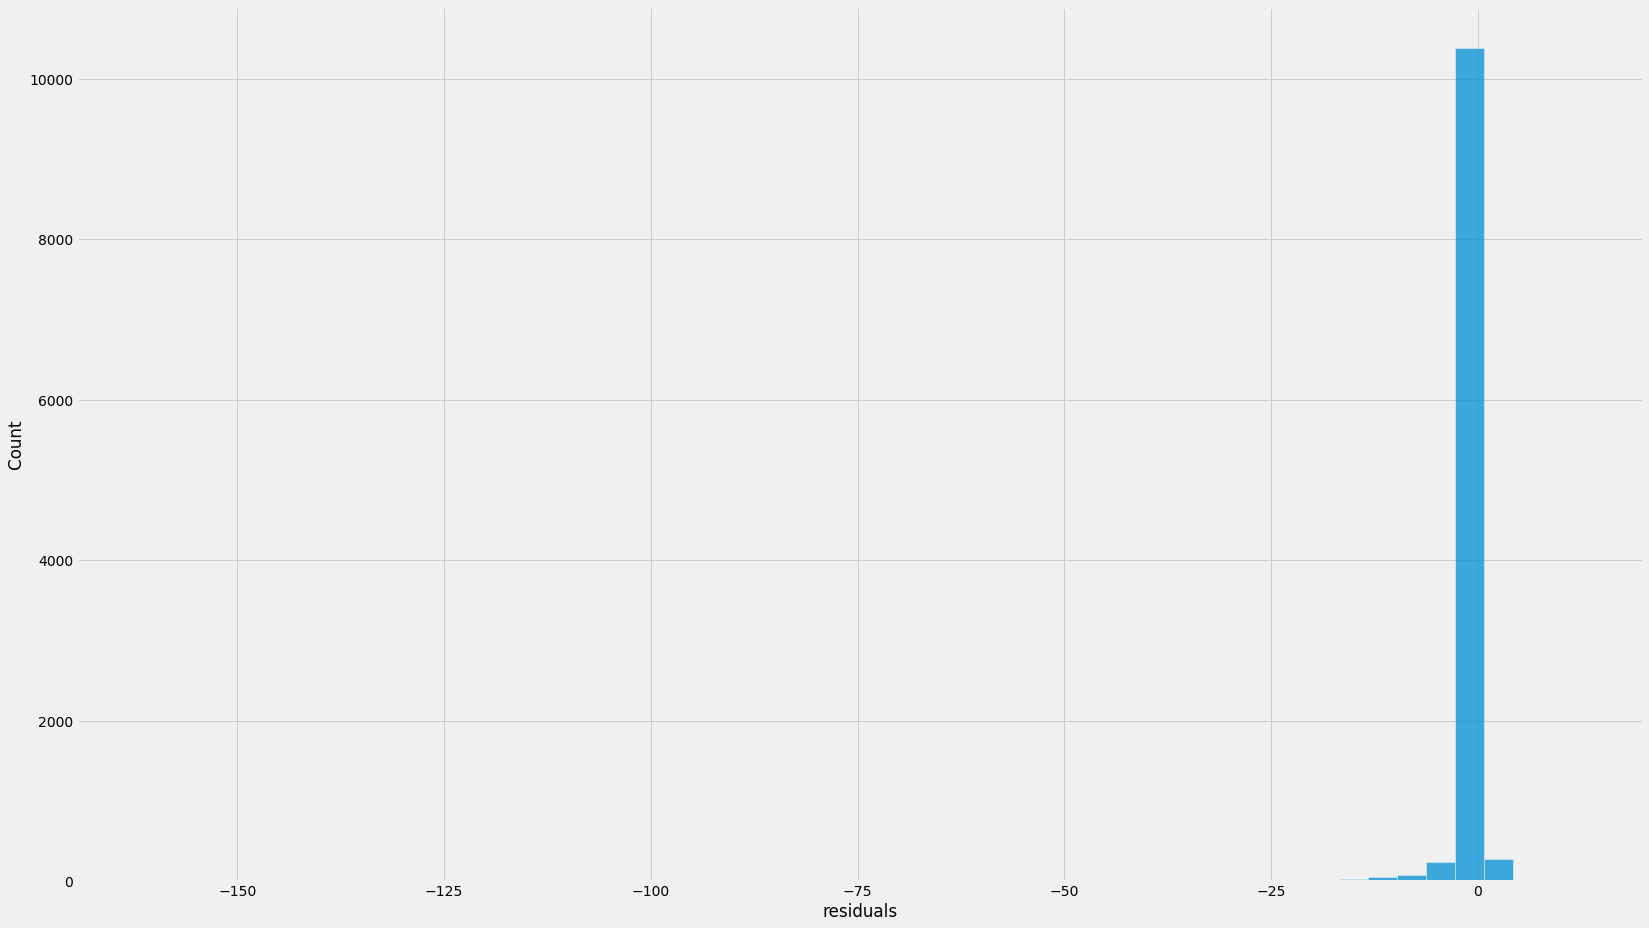

In [19]:
x = data['residuals']
plt.figure(figsize=(25,15))
sns.histplot(x, bins=np.linspace(x.min(), x.max()))

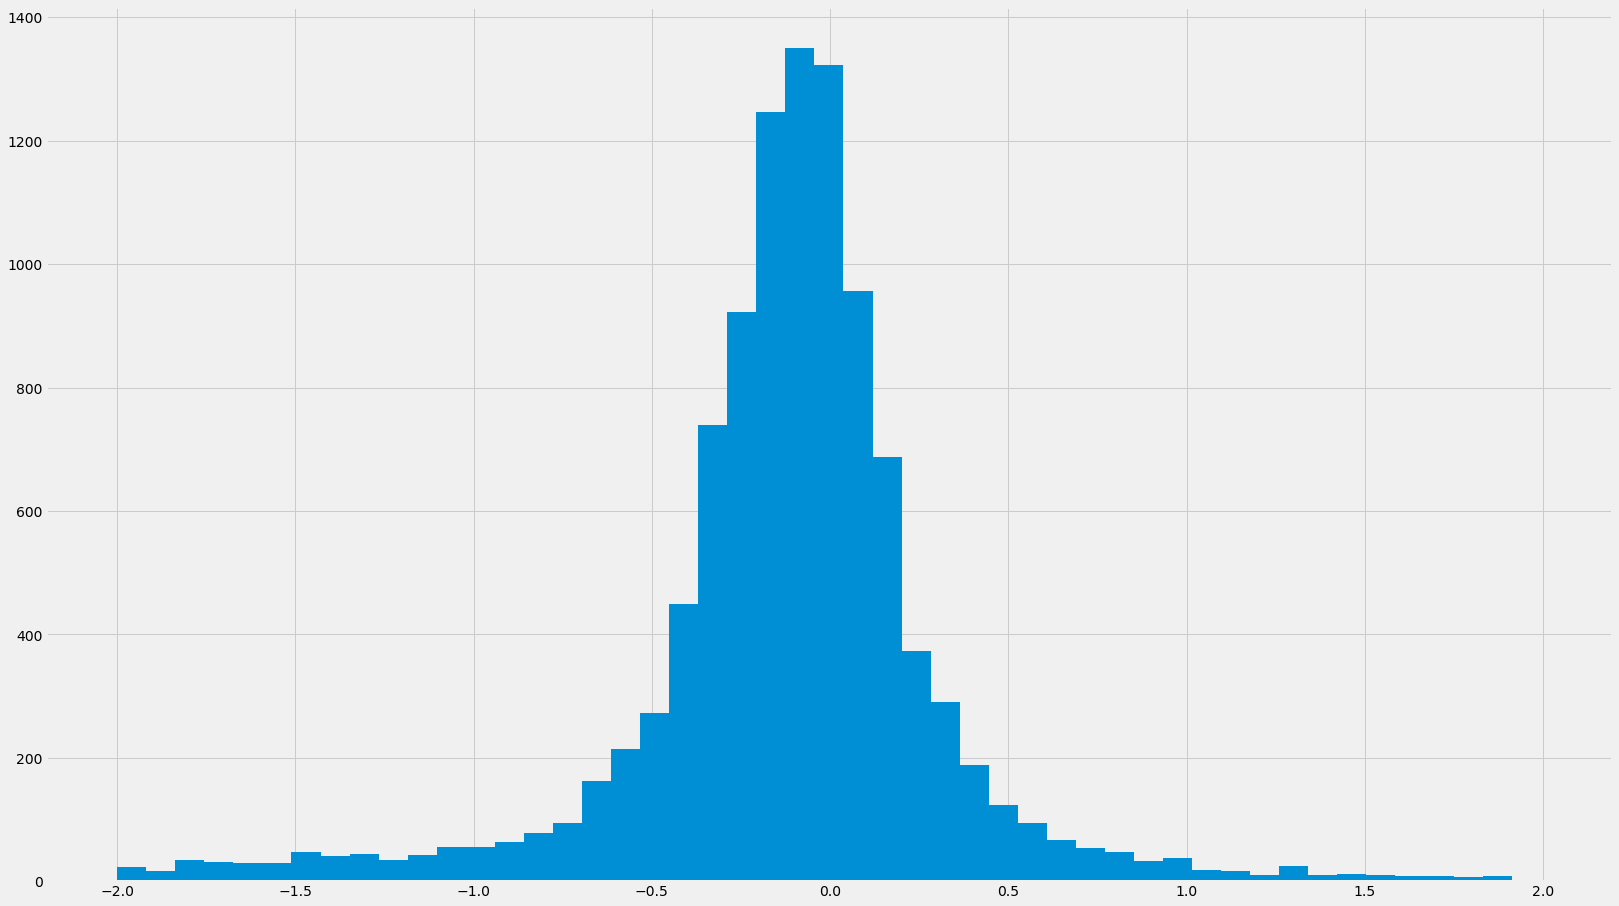

In [20]:
# Filtter data  to better understand the data
x = data.loc[(data['residuals'] > -2) & (data['residuals'] < 2)]['residuals']
plt.figure(figsize=(25,15))
y,bins,_ =plt.hist(x, bins=np.linspace(x.min(), x.max()))

In [21]:
gauss = lambda x, a, mu, sigma,b : a*stats.norm.pdf(x, mu, sigma)+ b

# bin centers
bin_centers = 0.5*(bins[1:]+bins[:-1])

# set Poisson uncertainty for each bin   
poisson_err =  np.sqrt(np.abs(y))

# curve fitting 
par, cov = optimize.curve_fit(gauss,xdata = bin_centers, ydata = y, sigma = poisson_err) 

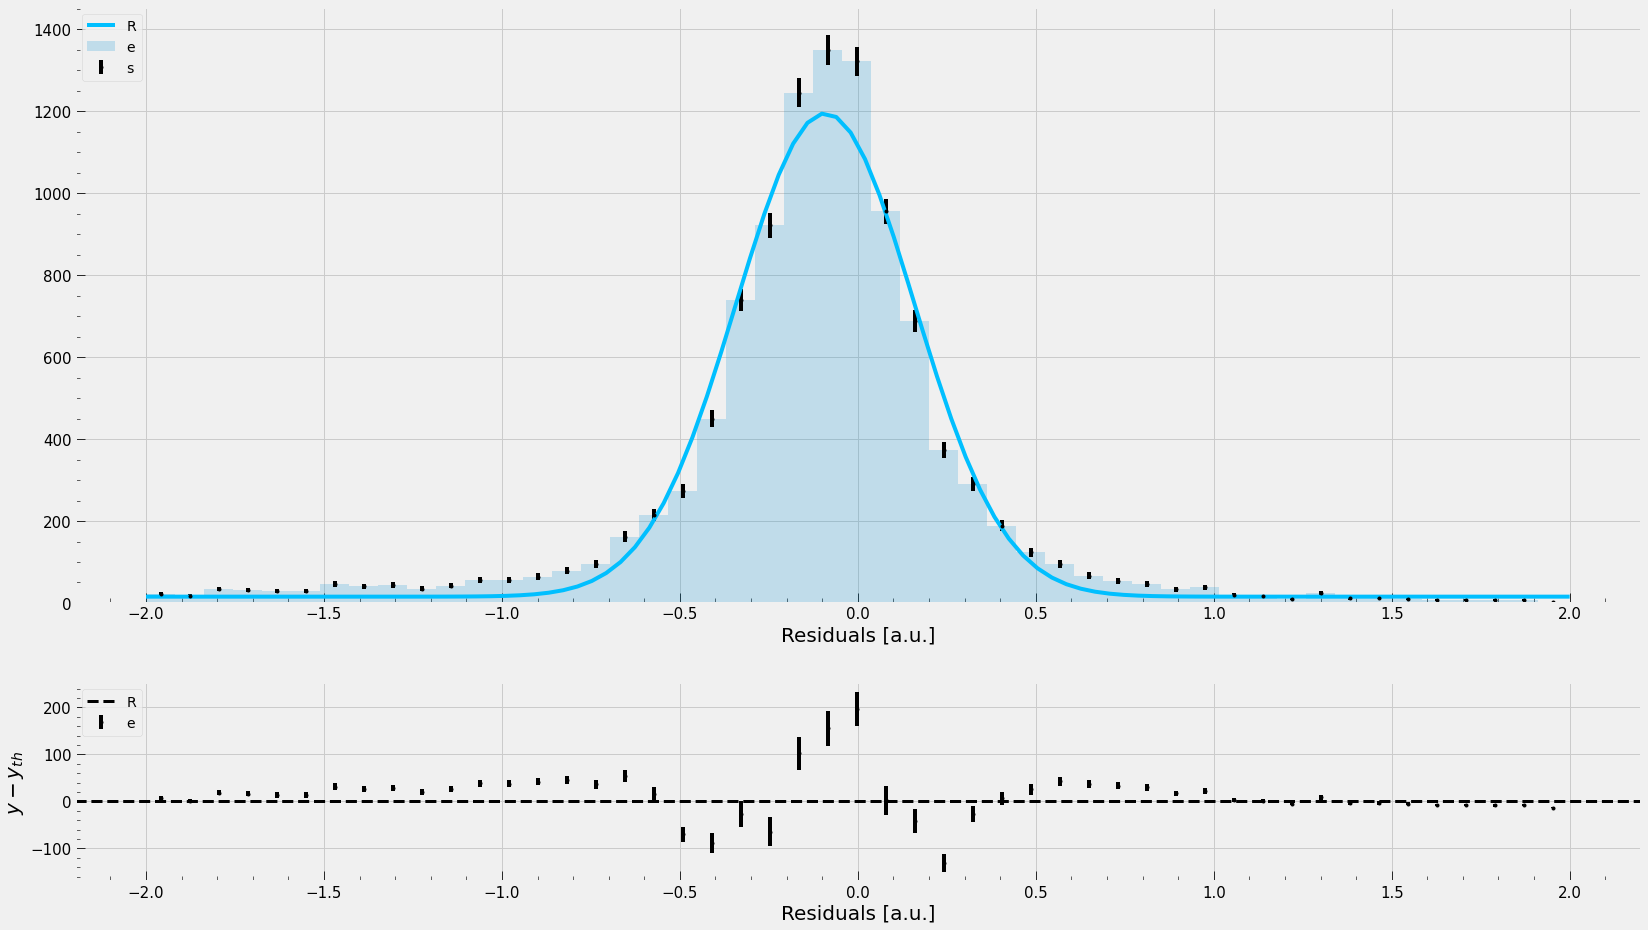

In [22]:
# ploting the results
r = np.linspace(-2,2,100)
fig = plt.figure(figsize=(25,15))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharex = ax1)

ax1.hist(x, bins=np.linspace(x.min(), x.max()), alpha = 0.2)
ax1.errorbar(bin_centers, y, yerr=poisson_err,fmt='.k', label = 'Estimated Error')
ax1.plot(r, gauss(r,*par), color = 'deepskyblue', label = 'Gaussian Fitted curve')
plt.legend(loc='upper left')


y_th = gauss(bin_centers, *par)
residual = y - y_th

ax2.errorbar(bin_centers, residual, yerr = poisson_err, fmt='.k')
ax2.axhline(color = 'black', linewidth = 3, linestyle = '--')
ax2.set_ylabel('$y-y_{th}$', fontsize = 20) 

for ax in fig.get_axes():
    ax.set_xlabel('Residuals [a.u.]', fontsize = 20)                             
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.legend('Residual', loc='upper left')


In [23]:
ssr = np.sum((residual)**2)
tss = np.sum((np.mean(n) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(bin_centers,y)) 

R2 = 0.9840641750114575 
R = 0.9920000882114162
Covariance matrix:
 [[ 1.         -0.06109374]
 [-0.06109374  1.        ]]


In [24]:
# set the number of degrees of freedom
ndof = len(y) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
sigma_y = np.sqrt(np.abs(y))
chi2 =np.sum(((residual)**2) / sigma_y)
print("chi2 =", chi2)

# calculate the p-value
p_value = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", p_value)

n degrees of freedom = 48
chi2 = 6887.503277099685
p-value = 0.0


In [25]:
# Significance level
alpha = 0.05 

if p_value <= alpha:
    print("Since the p-value is  < α , the fit is considered unsatisfactory")
else:
    print("Since the p-value is > α , the fit is considered satisfactory")

Since the p-value is  < α , the fit is considered unsatisfactory


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [26]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-20 07:56:56--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 07:56:56--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bb937c5dc9a3315cb5dfaf75e.dl.dropboxusercontent.com/cd/0/inline/B06ras5DyogfGQgcK5t4u-rcx0_Jw7fs8H441XQhdNM09bm4aOiUskJrxYZtpp_-8KmEUeGFAJSEKSCTmyQVtjzxQFrJ7IRts6_Nw66sTXwvTQkRtMSZKli8pycv0z9puBn7o4nnTGNnzkom7szAB1upTRTmIf5QPK493uZDZNabMA/file# [following]
--2023-01-20 07:56:56--  https://uc7bb937c5dc9a3315cb5dfaf75e.dl.dropboxuserco

In [27]:
data = pd.read_csv('/content/munich_temperatures_average_with_bad_data.txt', sep =' ', names = ['time', 'temperatures'])

# Mask to work only in the range of 2008 to 2012
# also to delete the outliers in the temperature in order to improve the curve fitting and 
# and to get a better plots
mask = (data['time'] >= 2008) * (data['time'] <= 2012) * (data['temperatures'] < 60)
data_rg = data[mask]
data_rg.describe()

,time,temperatures
count,1459.000000,1459.000000
mean,2010.001711,9.261252
std,1.155104,7.906964
min,2008.002740,-10.777800
25%,2009.002395,2.916665
50%,2010.002740,9.388890
75%,2011.001030,15.611100
max,2011.999320,25.722200


In [28]:
f = lambda t,a,b,c : a * np.cos(2 * np.pi * t + b) + c
t, y = data_rg['time'], data_rg['temperatures']

fparams, fcov = optimize.curve_fit(f, t, y)

print('The best-fit values of the parameters are : \na = {} \nb = {} \nc = {}  '.format(*fparams))
print('\nThe overall average temperature in Munich is: {:1.1f} °C'.format(np.mean(y)))
print('\nThe typical daily average values predicted by the model for the coldest time of year are: {:.2f} °C'.format( f(t, *fparams).min()))
print('\nThe typical daily average values predicted by the model for the  hottest time of year are: {:.2f} °C'.format(f(t, *fparams).max()))

The best-fit values of the parameters are : 
a = -9.96203467789479 
b = 12.331742857750834 
c = 9.262821311360776  

The overall average temperature in Munich is: 9.3 °C

The typical daily average values predicted by the model for the coldest time of year are: -0.70 °C

The typical daily average values predicted by the model for the  hottest time of year are: 19.22 °C


* The variable "b" is the phase offset of the function. It represents the amount by which the function is shifted along the x-axis. This value can be positive or negative and determines the location of the function relative to the y-axis. It can also be thought of as the starting point of the function along the x-axis. The unit of "b" is radians.
* The variable "b" would not have a direct physical meaning. It represents a phase offset, or a shift along the x-axis, which does not have a direct correlation to temperature. However, it could be used to model a scenario where the temperature is affected by an external factor that causes it to shift in time, such as the rotation of the Earth relative to the sun (day and night cycles). In this case, the value of c could be used to represent the phase shift caused by this external factor.

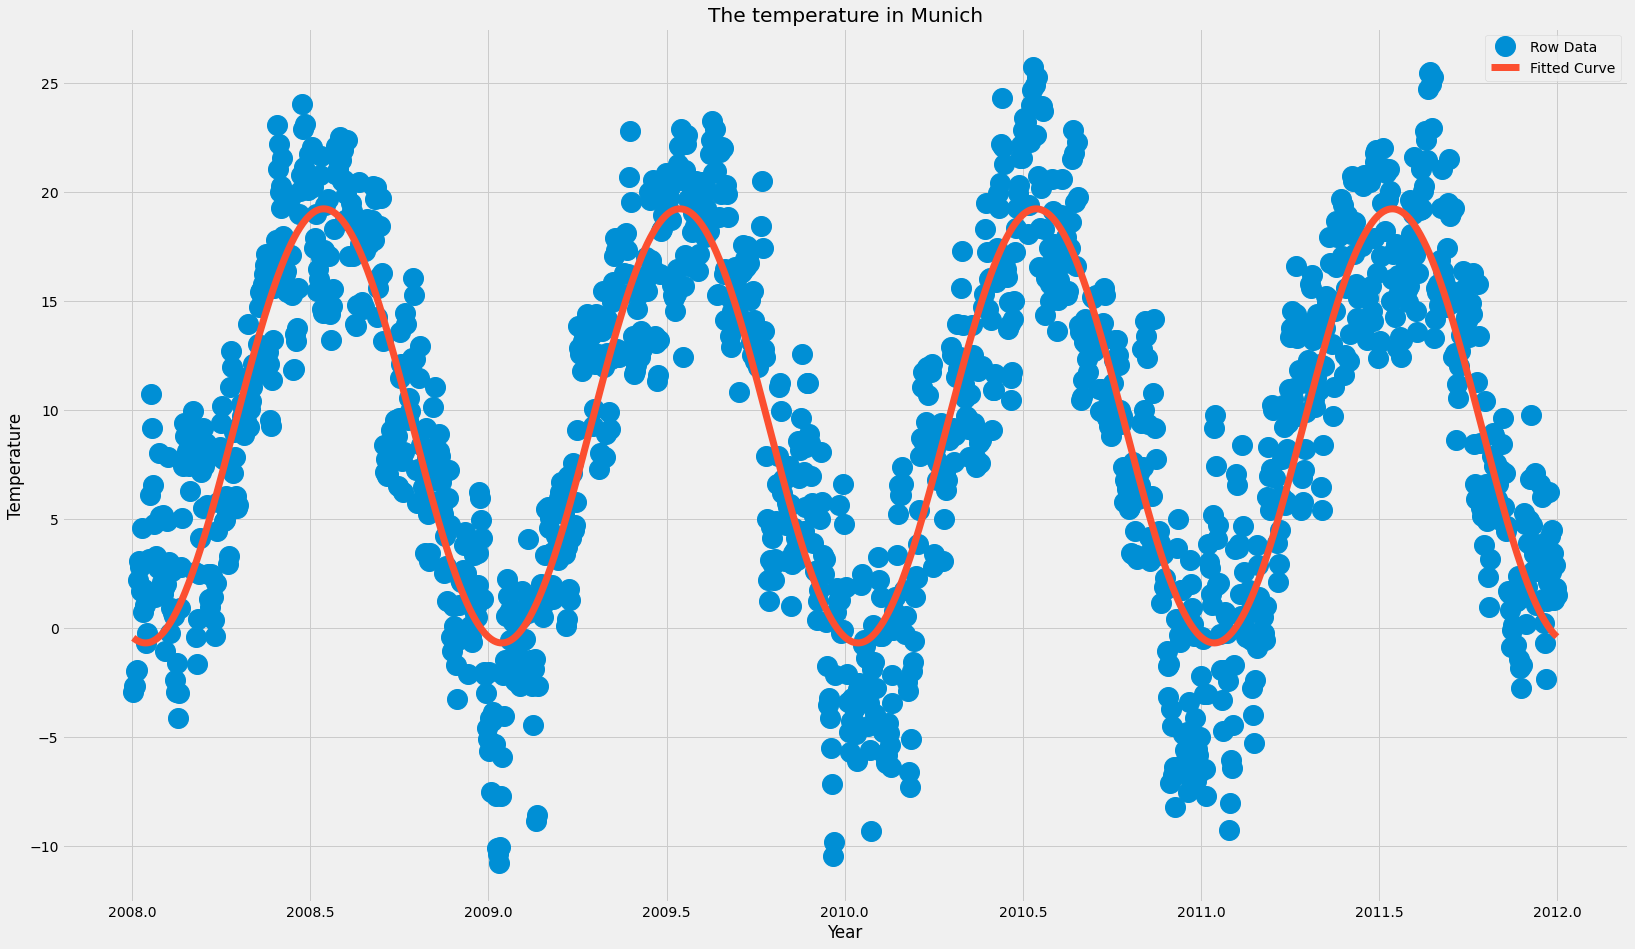

In [29]:
plt.figure(figsize=(25,15))
plt.plot(t, y, 'o',  markersize=20)
plt.plot(t, f(t, *fparams), linewidth=7.0)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('The temperature in Munich')
plt.legend(['Row Data','Fitted Curve' ])

In [30]:
g = lambda t,a,b,c,d : a * np.cos(2 * b * np.pi * t + c) + d
gparams, pcov = optimize.curve_fit(g,t,y)
print('The best-fit values of the parameters are : \na = {} \nb = {} \nc = {} \nd = {} '.format(*gparams))
print('\nThe overall average temperature in Munich is: {:1.1f} °C'.format(np.mean(y)))
print('\nThe typical daily average values predicted by the model for the coldest time of year are:  {:.2f} °C'.format( g(t, *gparams).min()))
print('\nThe typical daily average values predicted by the model for the  hottest time of year are: {:.2f} °C'.format(g(t, *gparams).max()))

The best-fit values of the parameters are : 
a = -9.960733329012482 
b = 1.0002935151529573 
c = 8.624773534161077 
d = 9.265675102040863 

The overall average temperature in Munich is: 9.3 °C

The typical daily average values predicted by the model for the coldest time of year are:  -0.70 °C

The typical daily average values predicted by the model for the  hottest time of year are: 19.23 °C


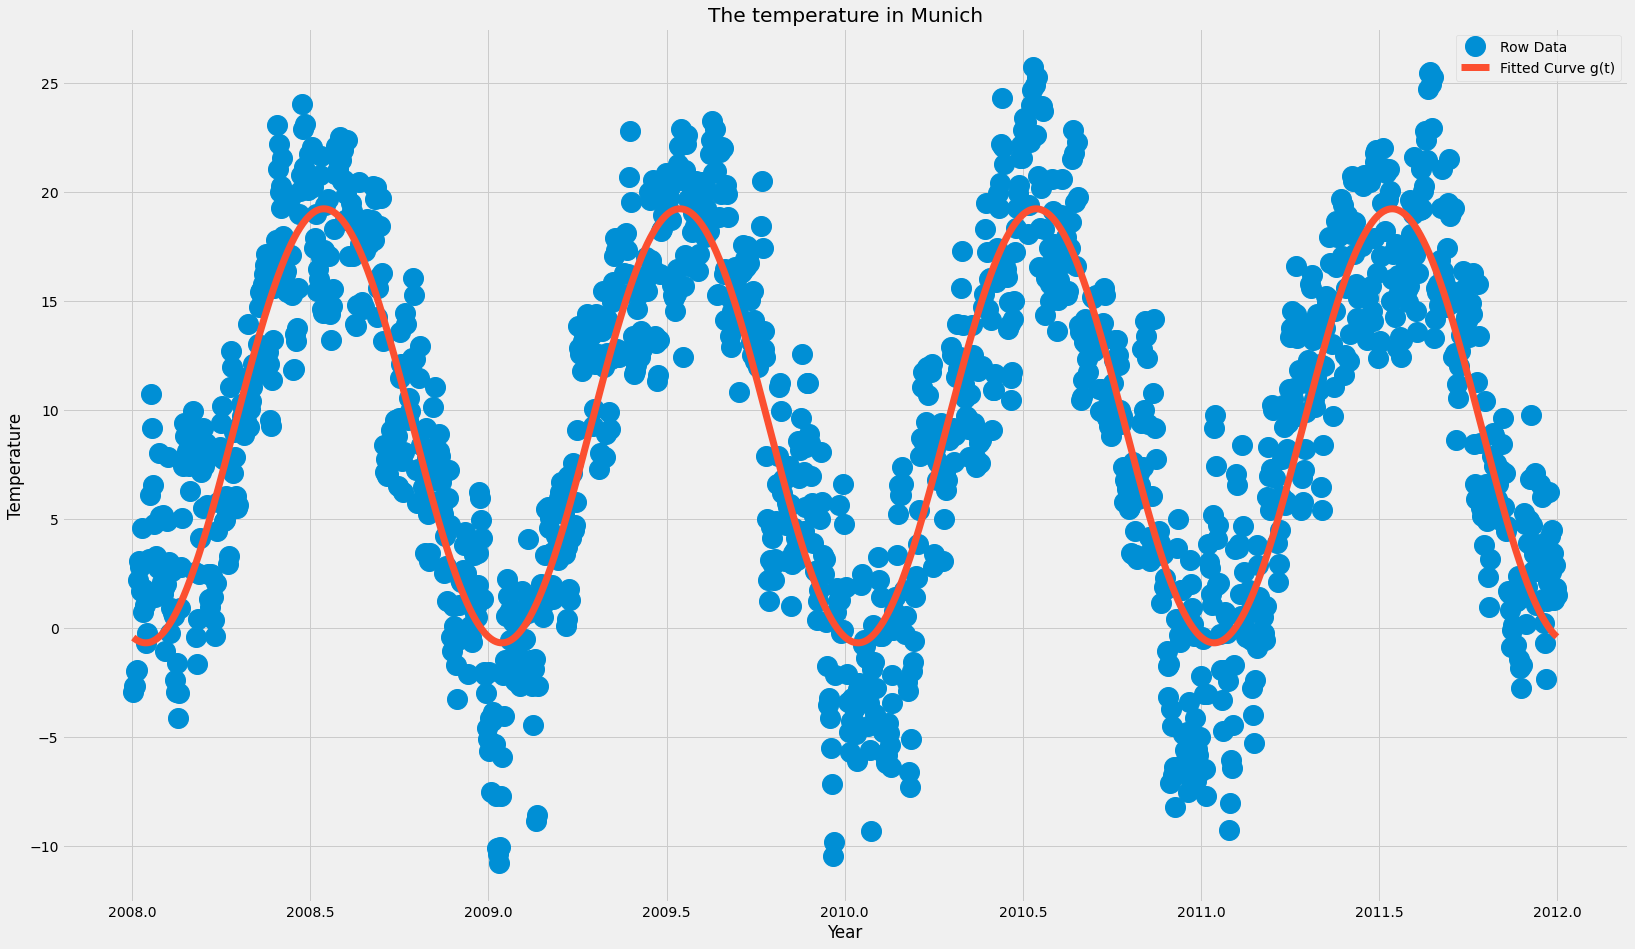

In [31]:
plt.figure(figsize=(25,15))
plt.plot(t,y, 'o',  markersize=20)
plt.plot(t, g(t, *gparams), linewidth=7.0)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('The temperature in Munich')
plt.legend(['Row Data','Fitted Curve g(t)' ])

In [32]:
def SSR(y_th):
  # Calculating the residuals 
  residual = y - y_th

  # Calculating sum of squared residuals
  SSR = np.sum(residual**2)
  return SSR

SSR_f = SSR(f(t, *fparams))
SSR_g = SSR(g(t, *gparams))
print('RSS value for f(x) is {:.3f}'.format(SSR_f))
print('RSS value for g(x) is {:.3f}'.format(SSR_g))

RSS value for f(x) is 18669.515
RSS value for g(x) is 18669.225


In [33]:
def fisher_f_test(sample1, sample2,nbins):
    """
    Calculates the Fisher F-test for two samples.
    """
    # Calculate the sum of squared residuals for the two samples

    ssr1 = SSR_f
    ssr2 = SSR_g

    # Calculate the F-test statistic
    nbins, ndof1,ndof2 =nbins, 3,4
    F = ((ssr1 - ssr2) / (ndof2 - ndof1)) / (ssr2 / (nbins - ndof2))
    print(F)
    p_value = 1 - stats.f.cdf(F, ndof2 - ndof1, nbins - ndof2)
    
    print("p-value: {:.3f}".format(p_value))
    print("Additional parameter necessary: ", "YES" if p_value < 0.10 else "NO")

    return F, p_value

fisher_f_test(f(t, *fparams), g(t, *gparams),nbins = len(t) )

0.022598552014679953
p-value: 0.881
Additional parameter necessary:  NO


(0.022598552014679953, 0.8805265627498096)